In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
salary=pd.read_csv('salarydataset.csv')
print(salary)

    SNo    Name   Age       City  Country   Salary
0     1     Tom  28.0    Toronto   Canada  20000.0
1     2     Lee  31.0    Edmonto   Canada   3900.0
2     3    Dave  34.0    Toronto   Canada   8000.0
3     4    Anik  26.0   HongKong     Asia  66672.0
4     5   kamal  30.0        NaN  America      NaN
5     6    Geet   NaN   HongKong     Asia  30007.0
6     7  Steven  43.0    BayArea  America   8300.0
7     8     Ram  38.0  Hyderabad     Asia  54666.0
8     9    hari  50.0    newyork  America  67666.0
9    11    yami   NaN    newyork  America   8888.0
10   12    Anik  26.0   HongKong     Asia  66672.0
11   13   kamal  30.0        NaN  America  34344.0
12   14    Geet  22.0   HongKong     Asia  30007.0
13   15  Steven  43.0        NaN  America   8300.0
14   16     Ram  38.0  Hyderabad     Asia  54666.0
15   17    hari   NaN    newyork  America  67666.0
16   18    yami  27.0    newyork  America   8888.0
17   19     Lee  31.0    Edmonto   Canada      NaN
18   20  Andrew  34.0      Cong

In [4]:
salarydf=pd.DataFrame(data=salary)
print(salarydf)

    SNo    Name   Age       City  Country   Salary
0     1     Tom  28.0    Toronto   Canada  20000.0
1     2     Lee  31.0    Edmonto   Canada   3900.0
2     3    Dave  34.0    Toronto   Canada   8000.0
3     4    Anik  26.0   HongKong     Asia  66672.0
4     5   kamal  30.0        NaN  America      NaN
5     6    Geet   NaN   HongKong     Asia  30007.0
6     7  Steven  43.0    BayArea  America   8300.0
7     8     Ram  38.0  Hyderabad     Asia  54666.0
8     9    hari  50.0    newyork  America  67666.0
9    11    yami   NaN    newyork  America   8888.0
10   12    Anik  26.0   HongKong     Asia  66672.0
11   13   kamal  30.0        NaN  America  34344.0
12   14    Geet  22.0   HongKong     Asia  30007.0
13   15  Steven  43.0        NaN  America   8300.0
14   16     Ram  38.0  Hyderabad     Asia  54666.0
15   17    hari   NaN    newyork  America  67666.0
16   18    yami  27.0    newyork  America   8888.0
17   19     Lee  31.0    Edmonto   Canada      NaN
18   20  Andrew  34.0      Cong

In [5]:
salarydf.shape

(22, 6)

In [6]:
salarydf.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [7]:
salarydf.describe()

,SNo,Age,Salary
count,22.000000,19.000000,19.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,7.174924,23151.188084
min,1.000000,22.000000,3900.000000
25%,6.250000,27.000000,8888.000000
50%,12.500000,31.000000,33451.000000
75%,17.750000,36.000000,54666.000000
max,23.000000,50.000000,67666.000000


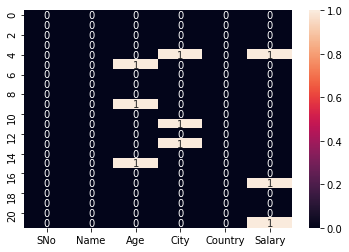

In [8]:
#verifying what are the null values with visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(salarydf.isnull(),annot=True)
plt.show()

In [9]:
#verifying the numbers of null values without visualization
salarydf.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [10]:
salaryfinal=salarydf.dropna()
print(salaryfinal)

    SNo    Name   Age       City  Country   Salary
0     1     Tom  28.0    Toronto   Canada  20000.0
1     2     Lee  31.0    Edmonto   Canada   3900.0
2     3    Dave  34.0    Toronto   Canada   8000.0
3     4    Anik  26.0   HongKong     Asia  66672.0
6     7  Steven  43.0    BayArea  America   8300.0
7     8     Ram  38.0  Hyderabad     Asia  54666.0
8     9    hari  50.0    newyork  America  67666.0
10   12    Anik  26.0   HongKong     Asia  66672.0
12   14    Geet  22.0   HongKong     Asia  30007.0
14   16     Ram  38.0  Hyderabad     Asia  54666.0
16   18    yami  27.0    newyork  America   8888.0
18   20  Andrew  34.0      Congo   Africa  34432.0
19   21   soham  32.0     Angola   Africa  34534.0
20   22    Grig  26.0    Finland   Europe  33451.0


In [11]:
salary_final=salaryfinal.drop(['SNo'],axis=1)
print(salary_final)

      Name   Age       City  Country   Salary
0      Tom  28.0    Toronto   Canada  20000.0
1      Lee  31.0    Edmonto   Canada   3900.0
2     Dave  34.0    Toronto   Canada   8000.0
3     Anik  26.0   HongKong     Asia  66672.0
6   Steven  43.0    BayArea  America   8300.0
7      Ram  38.0  Hyderabad     Asia  54666.0
8     hari  50.0    newyork  America  67666.0
10    Anik  26.0   HongKong     Asia  66672.0
12    Geet  22.0   HongKong     Asia  30007.0
14     Ram  38.0  Hyderabad     Asia  54666.0
16    yami  27.0    newyork  America   8888.0
18  Andrew  34.0      Congo   Africa  34432.0
19   soham  32.0     Angola   Africa  34534.0
20    Grig  26.0    Finland   Europe  33451.0


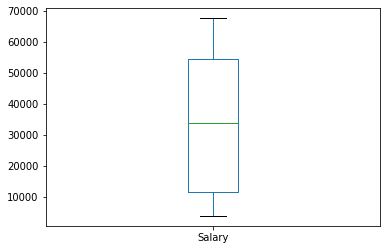

In [12]:
salary_final['Salary'].plot.box()

Age          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Salary    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
dtype: object

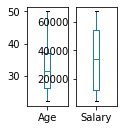

In [13]:
salary_final.plot(kind='box',subplots=True, layout=(2,7))

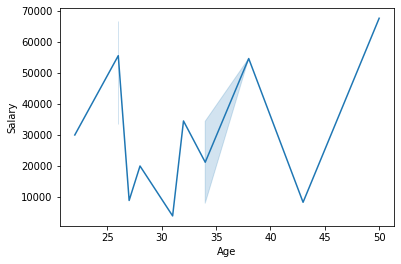

In [14]:
sns.lineplot(x=salary_final['Age'],y=salary_final['Salary'],data=salary_final)

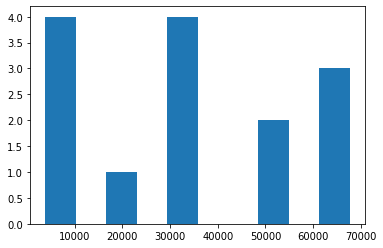

In [15]:
plt.hist(x='Salary',bins=10,data=salary_final)
plt.show()

In [16]:
# Checking the skewness of the dataset
salary_final.skew()

Age       0.905716
Salary    0.142454
dtype: float64

In [20]:
# treating the skewness using log
import numpy as np
if salary_final.skew().loc['Age']>0.55:
    salary_final['Age']=np.log1p(salary_final['Age'])

In [21]:
# Again checking the skewness of the dataset
salary_final.skew()

Age       0.448617
Salary    0.142454
dtype: float64

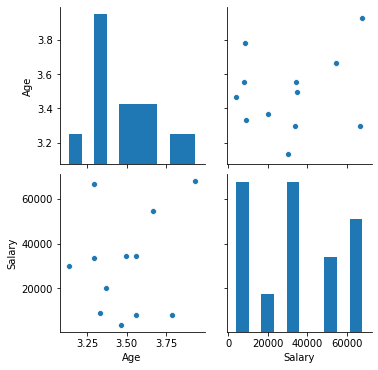

In [22]:
# checking the pair plot
import seaborn as sns
sns.pairplot(salary_final)
plt.show()

In [23]:
# separating the input and output/target variables
import numpy as np
df_x=pd.DataFrame(salary_final['Age'])
y=pd.DataFrame(salary_final['Salary'])

print(df_x.shape)
print(y.shape)

(14, 1)
(14, 1)


In [24]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [25]:
# Again checking the skewness of the dataset
x.skew()

Age    0.448617
dtype: float64

In [33]:
#dividing the train and test dataset and find out the r2 score corresponding to random state

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r2_score=0.0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('R2 score corresponding to random state:',r_state, 'is:',r2_scr)
    if r2_scr>max_r2_score:
        max_r2_score=r2_scr
        final_r_state=r_state
print('Maximum R2 score corresponding to random state',final_r_state,'is:',max_r2_score)   

R2 score corresponding to random state: 42 is: 0.07153364168569265
R2 score corresponding to random state: 43 is: -0.18031454452438744
R2 score corresponding to random state: 44 is: -5.558982825161505
R2 score corresponding to random state: 45 is: -5.558982825161509
R2 score corresponding to random state: 46 is: -0.2940351496083382
R2 score corresponding to random state: 47 is: -1.056656659671682
R2 score corresponding to random state: 48 is: -0.4384365876302314
R2 score corresponding to random state: 49 is: -0.35598361878820883
R2 score corresponding to random state: 50 is: -0.012842032504631007
R2 score corresponding to random state: 51 is: -0.3424595151614003
R2 score corresponding to random state: 52 is: -0.08017118855691319
R2 score corresponding to random state: 53 is: -5.188882567037823
R2 score corresponding to random state: 54 is: -0.39656197712774177
R2 score corresponding to random state: 55 is: -6.0766796055831795
R2 score corresponding to random state: 56 is: 0.64854268447

In [28]:
#checking the overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

-4.891947251786707

In [34]:
# Making the Final Model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=56)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [35]:
#Evaluating the Final Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print('r2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.7514321237316386
RMSE is: 946.0223034651096


In [36]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(lr,'lr_Salary.obj')


C:\Users\ajitk\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lr_Salary.obj']